In [1]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml("mnist_784")

In [2]:
type(dataset), type(dataset["data"]), type(dataset["target"])

(sklearn.utils.Bunch, numpy.ndarray, numpy.ndarray)

In [3]:
X, y = dataset["data"], dataset["target"]

In [4]:
X = X / 255.0

In [5]:
import matplotlib.pyplot as plt

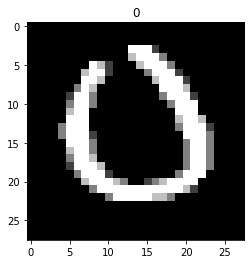

In [6]:
i = 10010
img_1 = X[i,:].reshape(28,28)
plt.imshow(img_1, cmap='gray')
plt.title(y[i])
plt.show()

In [7]:
import numpy as np

In [8]:
digits = 10
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [9]:
Y_new.shape

(10, 70000)

In [10]:
Y_new[:,100]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [11]:
y[0,100]

'5'

In [12]:
m = 60000
m_test = X.shape[0] - m
    
X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:,shuffle_index], Y_train[:,shuffle_index]

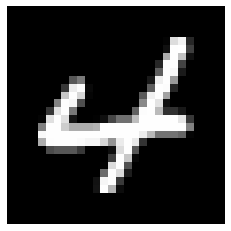

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [13]:
import matplotlib

i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = 'gray')
plt.axis("off")
plt.show()
Y_train[:,i]

In [14]:
def compute_multiclass_loss(Y, Y_hat):
    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum
    
    return L

In [15]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [16]:
def compute_loss(Y, Y_hat):
    
    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat + epsilon), Y) ) + np.sum( np.multiply(np.log(1-Y_hat + epsilon),(1-Y)) ) )
    return L

In [17]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  8.436752264185948
Epoch 100 cost:  0.7153096032097345
Epoch 200 cost:  0.5410302259491195
Epoch 300 cost:  0.4662254609709299
Epoch 400 cost:  0.4212752270045863
Epoch 500 cost:  0.38979621277610993
Epoch 600 cost:  0.365823946653947
Epoch 700 cost:  0.3466257168920846
Epoch 800 cost:  0.33070120938547315
Epoch 900 cost:  0.3171278871869236
Epoch 1000 cost:  0.3053151910901556
Epoch 1100 cost:  0.2948667976057859
Epoch 1200 cost:  0.28550728553384863
Epoch 1300 cost:  0.2770439277723179
Epoch 1400 cost:  0.2693381951286722
Epoch 1500 cost:  0.2622827267657598
Epoch 1600 cost:  0.2557882093356388
Epoch 1700 cost:  0.24977773105915893
Epoch 1800 cost:  0.24418520077073627
Epoch 1900 cost:  0.2389551632682955
Final cost: 0.2340899369333973


In [19]:
from sklearn.metrics import classification_report, confusion_matrix

Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 949    0    7    5    0    8   15    3    8    5]
 [   0 1114    5    2    0    2    4    8    2    7]
 [   9    3  955   24    4    4    4   21   11    1]
 [   2    5   14  918    2   45    0    5   23   11]
 [   0    0    4    2  898    7   12    7    5   37]
 [   7    0    3   19    1  778   13    1   16    9]
 [   6    2   10    2   21   18  899    1    9    3]
 [   3    0   11   11    4    5    4  950   14   14]
 [   3   10   19   24   10   20    7    3  874    7]
 [   1    1    4    3   42    5    0   29   12  915]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1000
           1       0.98      0.97      0.98      1144
           2       0.93      0.92      0.92      1036
           3       0.91      0.90      0.90      1025
           4       0.91      0.92      0.92       972
           5       0.87      0.92      0.89       847
           6       0.94      0.93      0.93       971
           7       0.92      0.94   